In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from utils.dataframe import read_final_csv

df = read_final_csv("catboost")

In [2]:
from utils.dataframe import delete_columns

last_n_matches = [5, 10, 20, 50]
df = delete_columns(df, last_n_matches)

In [3]:
correlations = df.corr(numeric_only=True)['player_1_won'].drop('player_1_won')
sorted_corrs = correlations.abs().sort_values(ascending=False)

# To see actual signed correlation (not just abs value)
strongest_corrs = correlations.loc[sorted_corrs.index]
print(strongest_corrs)

elo_diff                  0.373925
surface_elo_diff          0.357286
last_20_match_diff        0.324372
last_20_win_ratio_diff    0.324372
last_10_match_diff        0.316131
                            ...   
draw_size                 0.000418
Unnamed: 0               -0.000141
surface_Clay              0.000110
tourney_year             -0.000039
player_2_entry_Alt        0.000036
Name: player_1_won, Length: 64, dtype: float64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105733 entries, 0 to 105732
Data columns (total 65 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     105733 non-null  int64  
 1   player_1_ioc                   105733 non-null  int64  
 2   player_1_entry_ALT             105733 non-null  bool   
 3   player_1_entry_Alt             105733 non-null  bool   
 4   player_1_entry_LL              105733 non-null  bool   
 5   player_1_entry_PR              105733 non-null  bool   
 6   player_1_entry_Q               105733 non-null  bool   
 7   player_1_entry_SE              105733 non-null  bool   
 8   player_1_entry_WC              105733 non-null  bool   
 9   player_1_hand_L                105733 non-null  bool   
 10  player_1_hand_R                105733 non-null  bool   
 11  player_1_was_seeded            105733 non-null  bool   
 12  player_2_ioc                  

In [5]:
x = df.drop("player_1_won", axis=1)
y = df["player_1_won"]

In [6]:
split_year = 2022

x_train = df[df["tourney_year"] < split_year].drop("player_1_won", axis=1)
y_train = df[df["tourney_year"] < split_year]["player_1_won"]

x_val = df[df["tourney_year"] == split_year].drop("player_1_won", axis=1)
y_val = df[df["tourney_year"] == split_year]["player_1_won"]


x_test = df[df["tourney_year"] > split_year].drop("player_1_won", axis=1)
y_test = df[df["tourney_year"] > split_year]["player_1_won"]

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'player_1_ioc'}>,
        <Axes: title={'center': 'player_2_ioc'}>,
        <Axes: title={'center': 'draw_size'}>,
        <Axes: title={'center': 'tourney_year'}>,
        <Axes: title={'center': 'tourney_month'}>],
       [<Axes: title={'center': 'tourney_day'}>,
        <Axes: title={'center': 'rank_diff'}>,
        <Axes: title={'center': 'rank_points_diff'}>,
        <Axes: title={'center': 'seed_diff'}>,
        <Axes: title={'center': 'height_diff'}>,
        <Axes: title={'center': 'age_diff'}>],
       [<Axes: title={'center': 'h2h_diff'}>,
        <Axes: title={'center': 'surface_h2h_diff'}>,
        <Axes: title={'center': 'total_match_diff'}>,
        <Axes: title={'center': 'won_match_diff'}>,
        <Axes: title={'center': 'last_5_match_diff'}>,
        <Axes: title={'center': 'last_10_match_diff'}>],
       [<Axes: title={'center': 'last_20_match_diff'}>,
        <Axes: title={'center': 'las

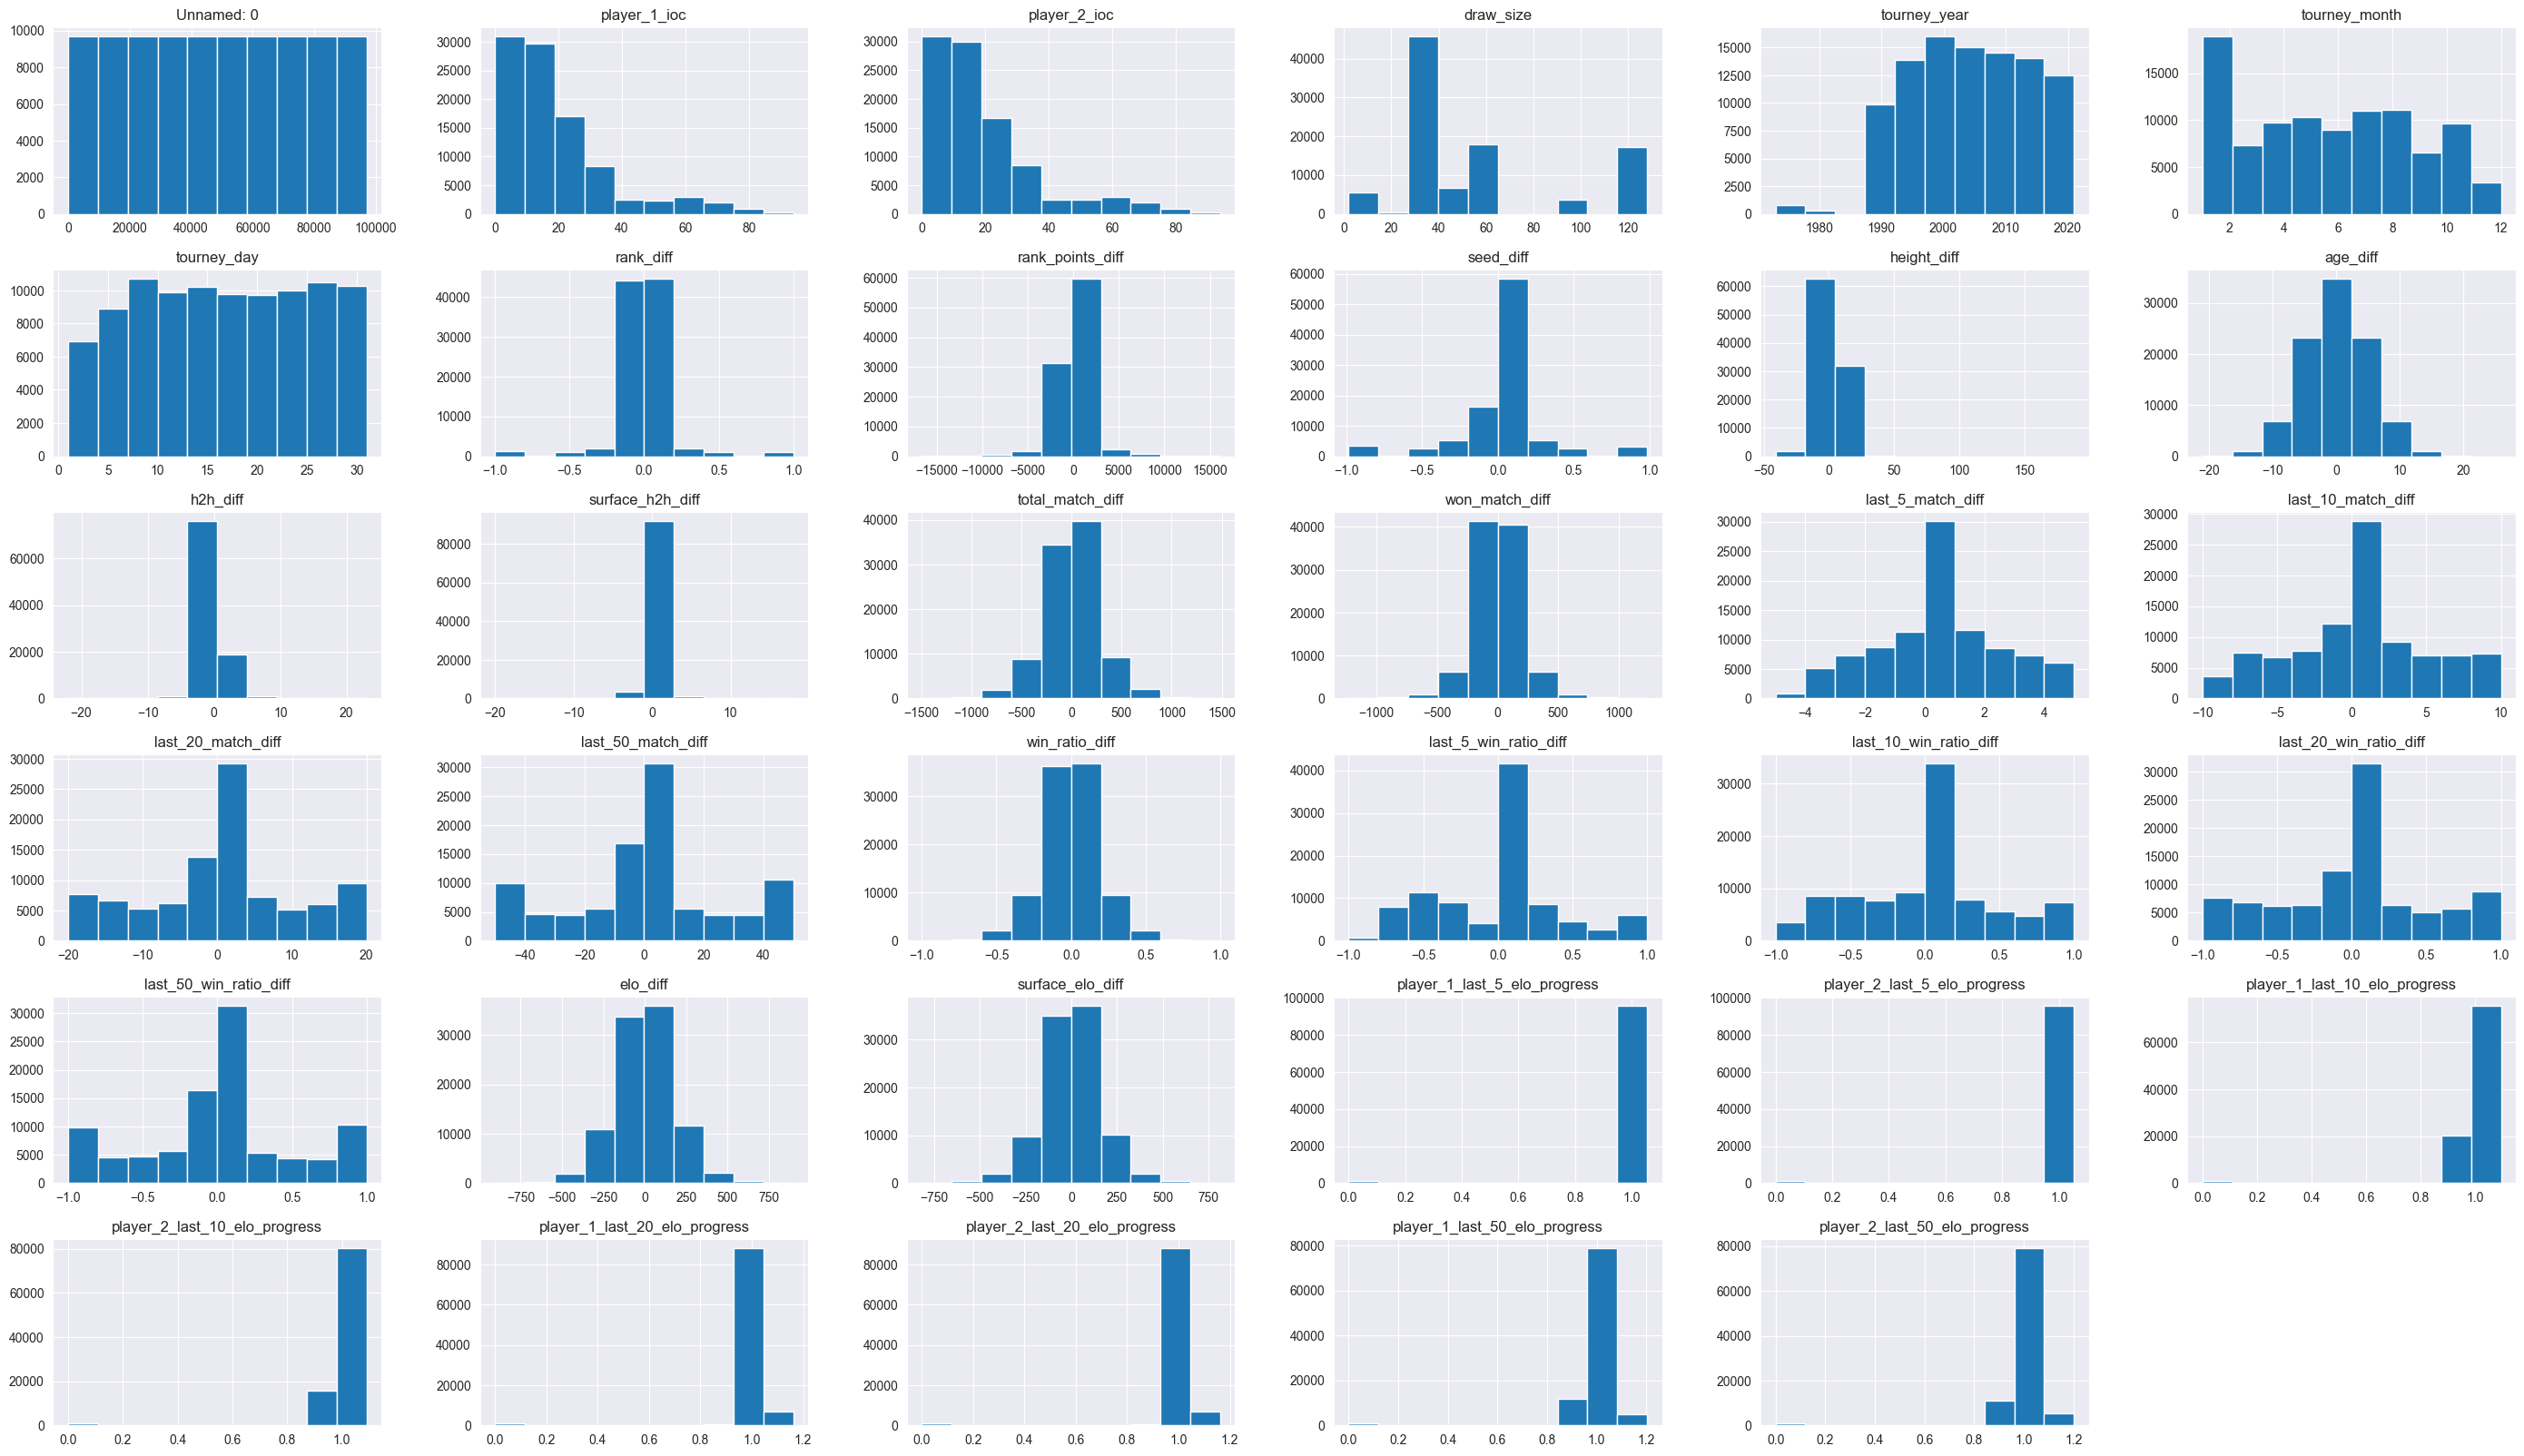

In [7]:
train_data = x_train.join(y_train)
train_data.hist(figsize=(35, 20))

<Axes: >

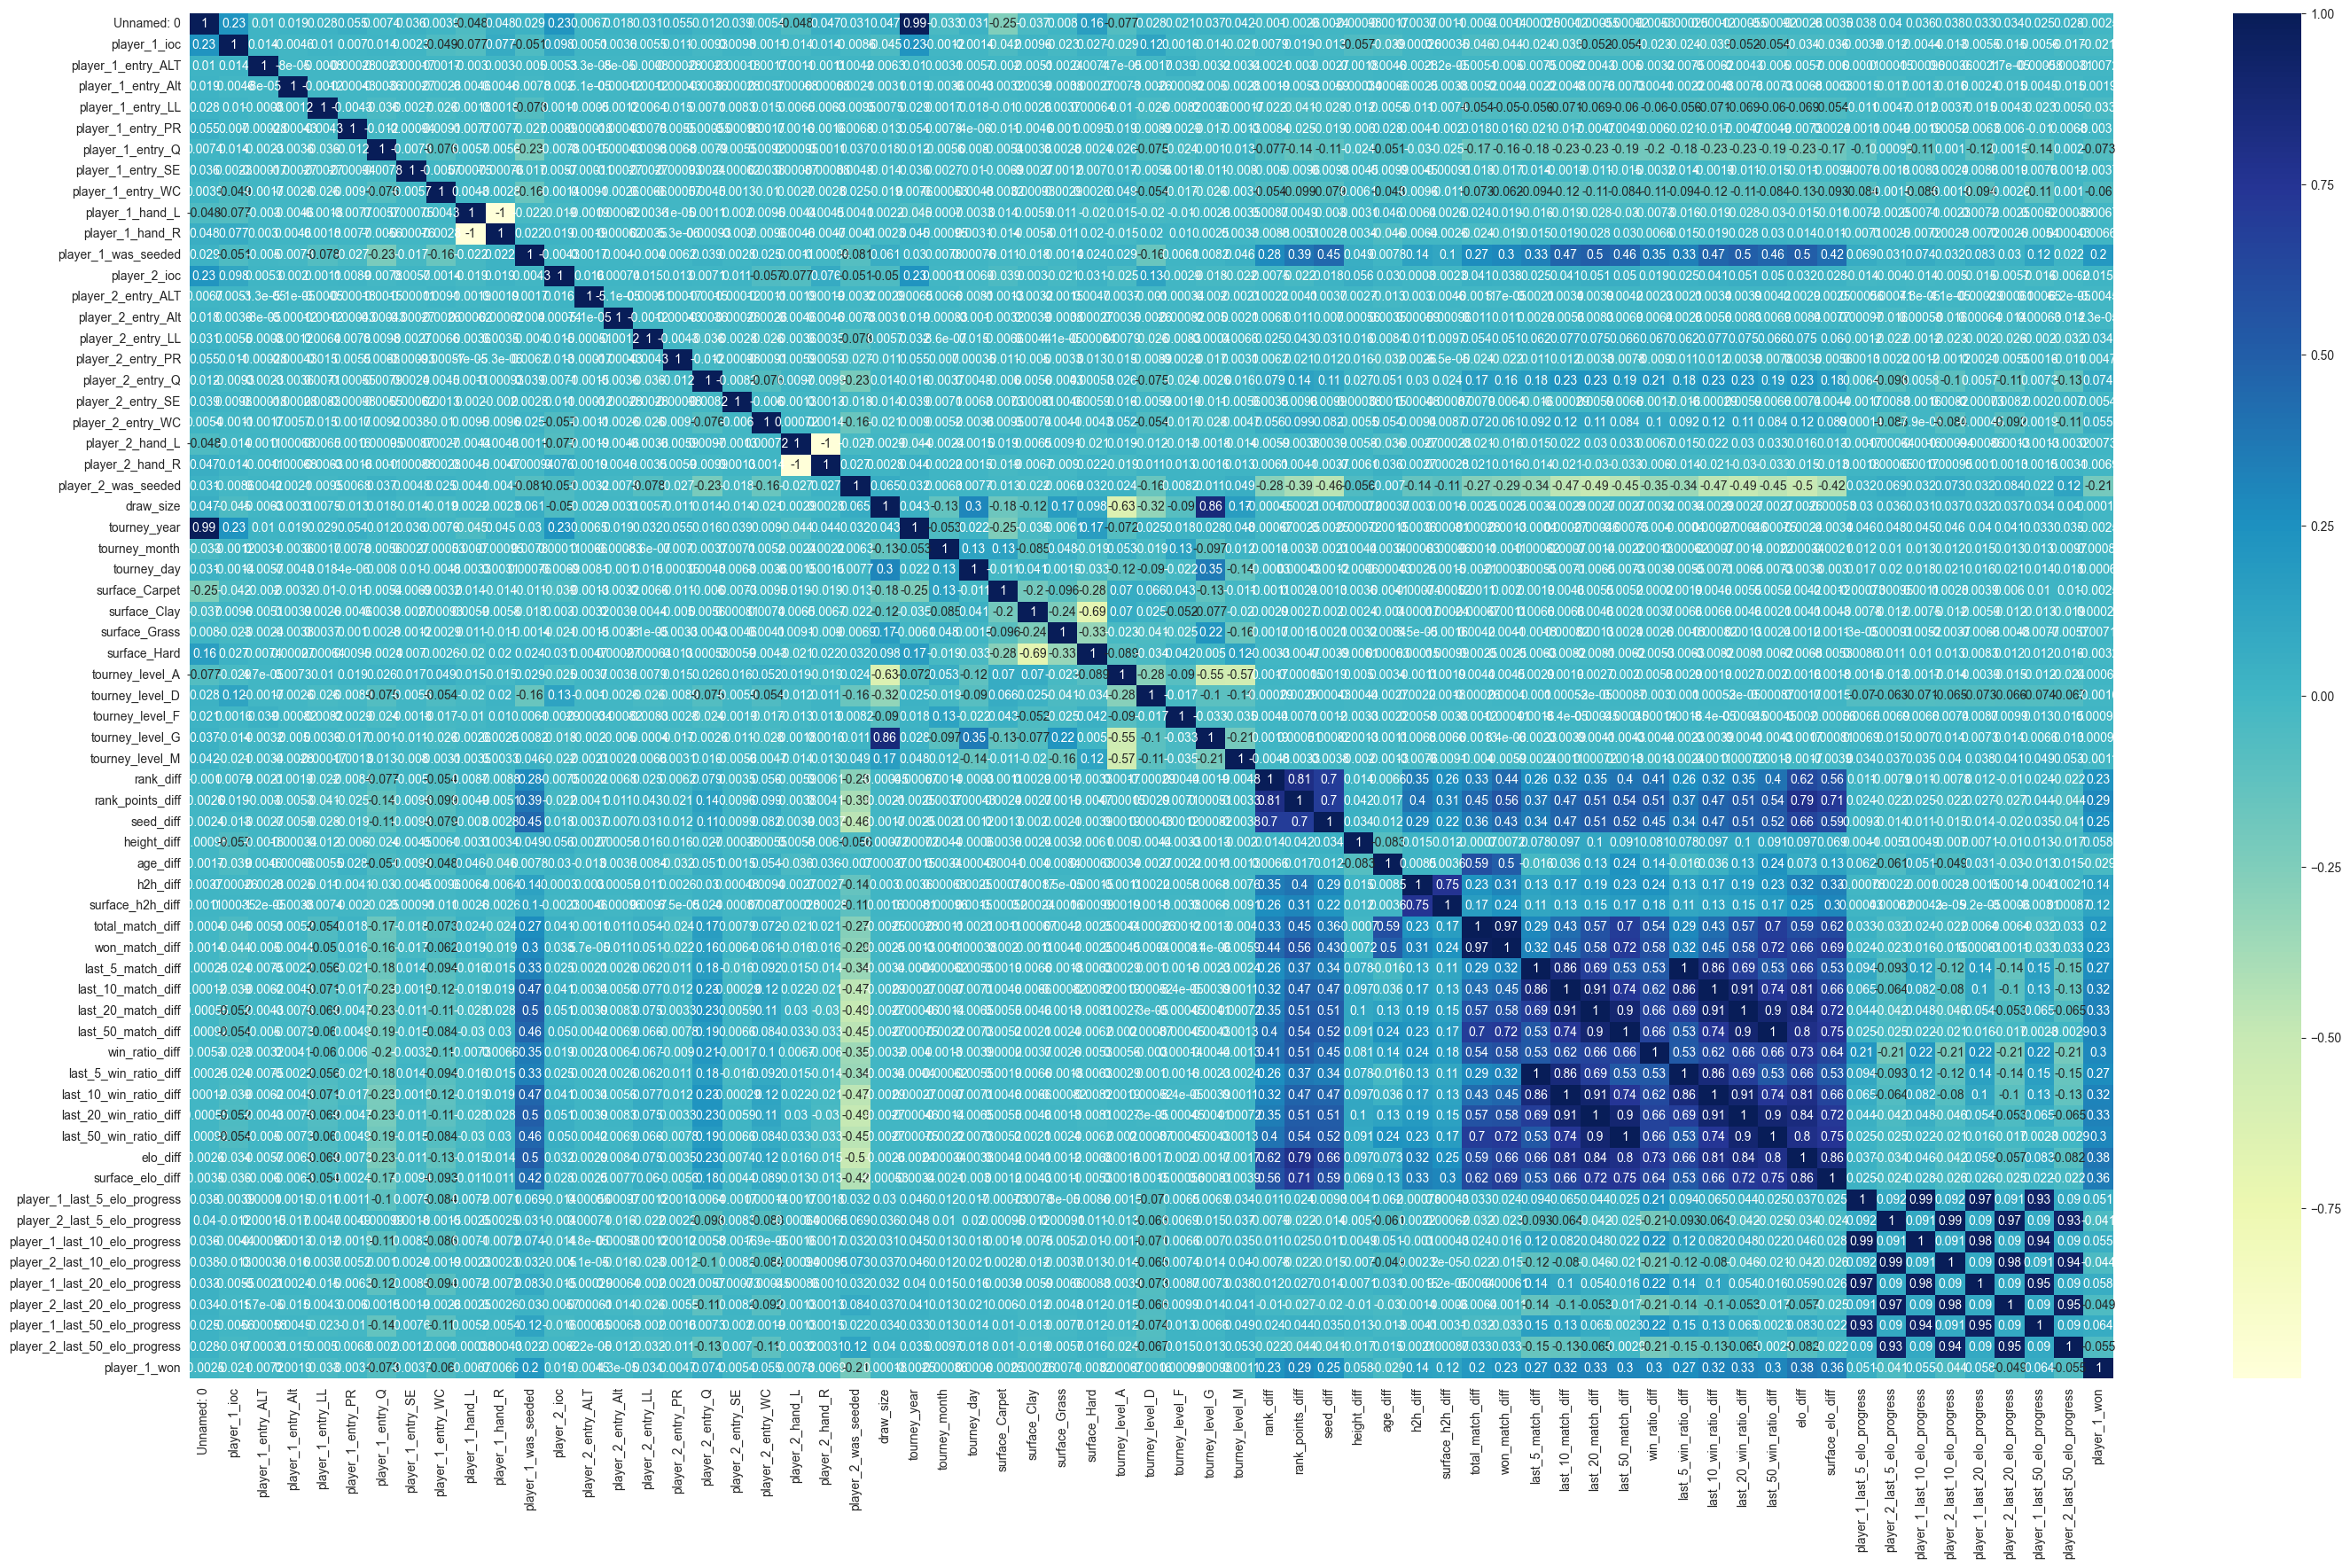

In [8]:
plt.figure(figsize=(35, 20))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [9]:
categorical_features = [
    "player_1_ioc", "player_2_ioc",
]

In [10]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(random_state=42, early_stopping_rounds=100, cat_features=categorical_features)
model.fit(x_train, y_train, verbose=10, plot=True, eval_set=[(x_val, y_val)])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.098075
0:	learn: 0.6789926	test: 0.6789195	best: 0.6789195 (0)	total: 241ms	remaining: 4m
10:	learn: 0.6202018	test: 0.6216568	best: 0.6216568 (10)	total: 963ms	remaining: 1m 26s
20:	learn: 0.6085923	test: 0.6110172	best: 0.6110172 (20)	total: 1.75s	remaining: 1m 21s
30:	learn: 0.6045751	test: 0.6072817	best: 0.6072817 (30)	total: 2.5s	remaining: 1m 18s
40:	learn: 0.6023721	test: 0.6048153	best: 0.6048153 (40)	total: 3.24s	remaining: 1m 15s
50:	learn: 0.6007543	test: 0.6032648	best: 0.6032648 (50)	total: 4.03s	remaining: 1m 14s
60:	learn: 0.5997150	test: 0.6025692	best: 0.6025692 (60)	total: 4.81s	remaining: 1m 14s
70:	learn: 0.5986024	test: 0.6018909	best: 0.6018860 (69)	total: 5.57s	remaining: 1m 12s
80:	learn: 0.5975558	test: 0.6016159	best: 0.6015642 (73)	total: 6.39s	remaining: 1m 12s
90:	learn: 0.5964593	test: 0.6006890	best: 0.6006890 (90)	total: 7.55s	remaining: 1m 15s
100:	learn: 0.5953821	test: 0.6002148	best: 0.6001111 (97)	total: 8.59s	remaining: 1m 1

In [14]:
accuracy = model.score(x_test, y_test)
print(f"CatBoost Accuracy -> {accuracy * 100}%")

CatBoost Accuracy -> 65.1425679095664%


In [15]:
import os

total_cores = os.cpu_count() or 1
usable_cores = max(1, total_cores - 4)

In [29]:
# --- 1. Imports ------------------------------------------------------
from scipy.stats import randint, uniform          # ← use scipy, not random!
from catboost import CatBoostClassifier
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import roc_auc_score


param_dist = {
    "depth":              randint(4, 10),        # 4 ≤ depth < 10
    "iterations":         randint(300, 2000),
    "learning_rate":      uniform(0.01, 0.29),   # 0.01 – 0.30
    "l2_leaf_reg":        uniform(1, 9),
    # "subsample":          uniform(0.6, 0.4),     # 0.6 – 1.0
    "bagging_temperature":uniform(0.0, 1.0),
    "border_count":       randint(64, 256)
}

# --- 4. Time-series CV ----------------------------------------------
tscv = TimeSeriesSplit(n_splits=5, gap=5)

# --- 5. Base CatBoost estimator -------------------------------------
base_cbc = CatBoostClassifier(
    loss_function  = "Logloss",
    eval_metric    = "AUC",
    random_state   = 42,
    verbose        = 0,
    task_type      = "CPU",      # set to "CPU" if no CUDA
    use_best_model = True
)

# --- 6. Randomised search wrapper -----------------------------------
search = RandomizedSearchCV(
    estimator           = base_cbc,
    param_distributions = param_dist,
    n_iter              = 50,
    scoring             = "roc_auc",
    cv                  = tscv,
    refit               = True,
    n_jobs              = usable_cores,
    verbose             = 2,
    random_state        = 42
)

# --- 7. Fit with early stopping -------------------------------------
search.fit(x_train, y_train,
           eval_set=[(x_val, y_val)],
           early_stopping_rounds=50)
print("\n─ Best parameters ─────────────────")
print(search.best_params_)
print("Best CV AUC:", round(search.best_score_, 4))

best_params = search.best_params_.copy()
best_model = search.best_estimator_

# --- 8. Hold-out evaluation -----------------------------------------
test_auc = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])
print("\nHold-out AUC:", round(test_auc, 4))

# --- 9. Feature importance snapshot ---------------------------------
print(best_model.get_feature_importance(prettified=True).head(10))


Fitting 5 folds for each of 50 candidates, totalling 250 fits

─ Best parameters ─────────────────
{'bagging_temperature': np.float64(0.1393314544058757), 'border_count': 206, 'depth': 6, 'iterations': 840, 'l2_leaf_reg': np.float64(3.059183489424602), 'learning_rate': np.float64(0.03232417385034997)}
Best CV AUC: 0.7364

Hold-out AUC: 0.7192
                      Feature Id  Importances
0               surface_elo_diff    17.229878
1                       elo_diff    15.166397
2                       age_diff     7.686731
3                      rank_diff     6.328165
4               rank_points_diff     5.386907
5                 win_ratio_diff     4.740629
6  player_1_last_50_elo_progress     2.129559
7                     Unnamed: 0     2.034211
8                      draw_size     1.914712
9  player_2_last_50_elo_progress     1.852761


In [30]:
final_cbc = CatBoostClassifier(
    # --- core settings carried over from your baseline ---
    loss_function  = "Logloss",
    eval_metric    = "AUC",
    random_state   = 42,
    task_type      = "CPU",
    use_best_model = True,       # keeps only the best boosting round
    verbose        = 200,        # show progress every 200 iters
    # --- insert tuned hyper-parameters here ---
    **best_params
)


final_cbc.fit(
    x_train, y_train,
    eval_set=[(x_val, y_val)],   # hold-out remains untouched
    early_stopping_rounds=50      # same patience you used before
)

0:	test: 0.7114111	best: 0.7114111 (0)	total: 22.7ms	remaining: 19s
200:	test: 0.7339710	best: 0.7339710 (200)	total: 4.21s	remaining: 13.4s
400:	test: 0.7360878	best: 0.7362666 (388)	total: 7.99s	remaining: 8.74s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7368531398
bestIteration = 514

Shrink model to first 515 iterations.


In [31]:
from sklearn.metrics import roc_auc_score

test_auc  = roc_auc_score(y_test, final_cbc.predict_proba(x_test)[:, 1])
print(f"Final hold-out AUC: {test_auc:.4f}")

test_accuracy = final_cbc.score(x_test, y_test)
print(f"Final hold-out accuracy: {test_accuracy * 100:.2f}%")

print("\nTop-10 features (PredictionValuesChange):")
print(final_cbc.get_feature_importance(prettified=True).head(10))

Final hold-out AUC: 0.7192
Final hold-out accuracy: 65.19%

Top-10 features (PredictionValuesChange):
                      Feature Id  Importances
0               surface_elo_diff    17.229878
1                       elo_diff    15.166397
2                       age_diff     7.686731
3                      rank_diff     6.328165
4               rank_points_diff     5.386907
5                 win_ratio_diff     4.740629
6  player_1_last_50_elo_progress     2.129559
7                     Unnamed: 0     2.034211
8                      draw_size     1.914712
9  player_2_last_50_elo_progress     1.852761
